In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

# K-mean Clustering for Data Analysis
    -  We use k-means clustering to identify the most important features that contribute to app success, such as the size of the app or the minimum Android version required... 

## Read Data

In [2]:
# read data as dataframe from csv file
df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_16776\1127482945.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
b'Skipping line 78700: expected 20 fields, saw 21\nSkipping line 85033: expected 20 fields, saw 21\n'
b'Skipping line 128092: expected 20 fields, saw 22\n'
b'Skipping line 197000: expected 20 fields, saw 21\nSkipping line 218421: expected 20 fields, saw 21\n'
b'Skipping line 330474: expected 20 fields, saw 21\nSkipping line 337681: expected 20 fields, saw 21\n'
b'Skipping line 556266: expected 20 fields, saw 21\n'
b'Skipping line 641092: expected 20 fields, saw 21\n'
b'Skipping line 759119: expected 20 fields, saw 21\n'
b'Skipping line 801997: expected 20 fields, saw 22\n'
b'Skipping line 823248: expected 20 fields, saw 21\n'
b'Skipping line 1044981: expected 20 fields, saw 21\n'
b'Skipping line 1138871: 

In [3]:
#print siza of the data
print(df.shape)

(1900333, 20)


In [4]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0.0,10000000,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0.0,2.9000000,5.0 and up,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0.0,3.7000000,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0.0,1.8000000,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0.0,6.2000000,4.1 and up,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
5,IMOCCI,com.imocci,Social,0.0,0,50+,50,89,True,0.0,46000000,6.0 and up,Imocci GmbH,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12,"1,000+",1000,2567,True,0.0,2.5000000,4.1 and up,android developer779,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39,500+,500,702,True,0.0,16000000,5.0 and up,Mozaix LLC,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,False,False,False
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0,10+,10,18,True,0.0,1.3000000,4.4 and up,Yilver Molina Hurtatiz,yilver.mh1996@gmail.com,"Jun 15, 2020","Dec 07, 2018",Teen,False,False,False
9,Dodge The Cars!,com.MrScratchEnterprises.CarDogeGame,Racing,4.9,55,100+,100,329,True,0.0,51000000,4.4 and up,MrScratch,mithalaarush@gmail.com,"Jul 30, 2020","Jul 30, 2020",Everyone,False,False,False


### Clean Data

In [5]:
df=convert_to_numeric(df)
df.head(10)

e:\fourth year\second term\big data\project\XL-Data\DataAnalysis\Clustering\utils.py:67: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10.0,NaN,NaN,True,0.0,10.000000,7.1,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,5000.0,NaN,NaN,True,0.0,0.000003,5.0,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50.0,NaN,NaN,True,0.0,0.000004,4.0.3,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10.0,NaN,NaN,True,0.0,0.000002,4.0.3,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100.0,NaN,NaN,True,0.0,0.000006,4.1,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
5,IMOCCI,com.imocci,Social,0.0,0,50.0,NaN,NaN,True,0.0,46.000000,6.0,Imocci GmbH,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12,1000.0,NaN,NaN,True,0.0,0.000003,4.1,android developer779,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39,500.0,NaN,NaN,True,0.0,16.000000,5.0,Mozaix LLC,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,False,False,False
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0,10.0,NaN,NaN,True,0.0,0.000001,4.4,Yilver Molina Hurtatiz,yilver.mh1996@gmail.com,"Jun 15, 2020","Dec 07, 2018",Teen,False,False,False
9,Dodge The Cars!,com.MrScratchEnterprises.CarDogeGame,Racing,4.9,55,100.0,NaN,NaN,True,0.0,51.000000,4.4,MrScratch,mithalaarush@gmail.com,"Jul 30, 2020","Jul 30, 2020",Everyone,False,False,False


## select required features
    - we will cluster apps to groups based on their features and identify the most important features that contribute to app success.
    -K-means clustering is designed to work with continuous features so we wil select them
    -By analyzing the clusters, you can identify which features are most strongly associated with successful apps, such as high ratings, large number of downloads,

In [6]:
# select installs and size (MB) columns
data = df[[ 'Size', 'Installs', 'Rating']]
data.head(10)
#print data type of each column

,Size,Installs,Rating
0,10.000000,10.0,0.0
1,0.000003,5000.0,4.4
2,0.000004,50.0,0.0
3,0.000002,10.0,5.0
4,0.000006,100.0,0.0
5,46.000000,50.0,0.0
6,0.000003,1000.0,4.5
7,16.000000,500.0,2.0
8,0.000001,10.0,0.0
9,51.000000,100.0,4.9


## choose optimal value of k

### 1- Elbow method

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

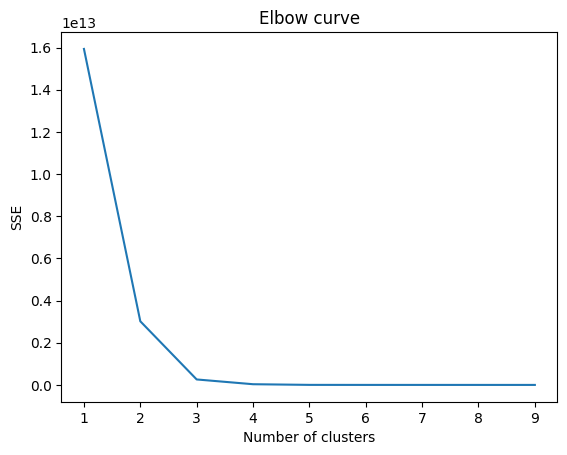

9

In [ ]:
elbow_method(data)

### Result
    Optimal value for k is 3

### 2- Silhouette method

In [8]:
silhouette_method(data)

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Centroid initilization with Kmean++

In [7]:
initial_centroids=kmeans_plus_plus(data, 3)

Initial centroids:  [array([17., 10.,  5.]), array([1.4e+01, 1.0e+04, 4.3e+00]), array([1.5e+01, 5.0e+03, 4.5e+00])]


## Apply K-mean

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


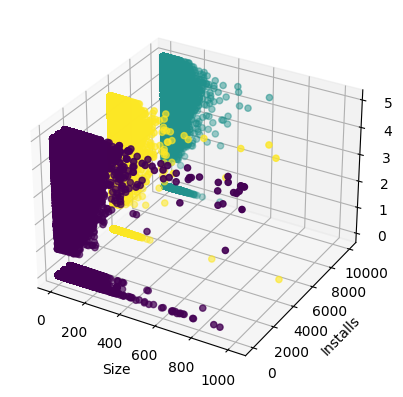

In [8]:
X,kmeans=k_mean(data, 3, initial_centroids)

### Evaluate with Silhouette Score

In [9]:
print("Score: ",silhouette_score(X, kmeans.labels_))

## Results